In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Linear Regression


Question: Write code to implement linear regression from scratch without using
any machine learning libraries like scikit-learn.

Answer Guidance: Be prepared to:
    *	Handle data input and preprocessing.
	*	Compute the OLS estimates manually.
	*	Implement matrix operations using libraries like NumPy.
	*	Optionally, write functions to predict new data points and calculate metrics like Mean Squared Error (MSE).


In [2]:
df = pd.read_csv('data/df_regression.csv') 
X = df[['X1','X2','X3']]
y = df['y']


In [3]:
# Generalizing for Multiple Linear Regression

def multiple_linear_regression(X,y):

    """
    Estimates the coefficients for a multiple linear regression model using the normal equation.

    This function computes the coefficients (weights) for a multiple linear regression model
    by solving the normal equation: beta = (X^T * X)^(-1) * X^T * y. It works for any number
    of predictors (independent variables) and includes an intercept term.

    Parameters:
    ----------
    X : array-like or list of lists
        Feature matrix containing the independent variables.
        Shape: (n_samples, n_features)
    
    y : array-like or list
        Target vector containing the dependent variable.
        Shape: (n_samples,)

    Returns:
    -------
    beta : numpy.ndarray
        Coefficient vector including the intercept term and coefficients for each predictor.
        Shape: (n_features + 1,)
    """    
    
    # Conver inout to numpy (in case they are dataframes..)
    X = np.array(X)
    y = np.array(y)

    # Add intercept
    ones = np.ones((X.shape[0], 1))  # vector of ones
    X = np.concatenate((ones, X), axis =1)

    #Compute the elements of the normal equations
    #     A = (X'X)**(-1) 
    #     B = X'Y
    #  beta = A* B is then the coefficient vector

    A = np.linalg.inv(( X.T.dot(X)))
    B = X.T.dot(y)

    beta = A.dot(B)

    return(beta)


multiple_linear_regression(X,y)


array([9.19994425, 3.08318585, 1.52085497, 2.13173927])

Note: In NumPy, the * operator performs element-wise multiplication, not matrix multiplication.
To perform matrix multiplication, use the .dot() method or the @ operator.


`A.dot(B)`:  Correct way to perform matrix multiplication in NumPy

In [4]:
def predict(X_new, beta):
    
    # Convert input to numpy array
    X_new = np.array(X_new)

    # Add intercept term
    ones = np.ones((X_new.shape[0]),1 )
    X_new = np.concat((ones, X_new), axis = 1)

    # Calculate prediction 

    y_pred = X_new.dot(beta)

    return y_pred

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse


A possible follow up question would be **How would you implement linear 
regression using gradient descent instead of the normal equation?** 

This gradient approach is especially useful when dealing with a large number of 
features or when the matrix inversion in the normal equation becomes computationally 
expensive. Gradient descent works by iteratively adjusting the coefficients to minimize the cost function, typically the Mean Squared Error (MSE) for linear regression.

### Key Concepts of Gradient Descent for Linear Regression

#### 3. Cost Function
The cost function measures how well the model's predictions match the actual data. For linear regression, the cost function is the Mean Squared Error (MSE):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$

where:
- $ m $ is the number of training examples.
- $ h_{\theta}(x^{(i)}) $ is the predicted value for the $ i $-th sample.
- $ y^{(i)} $ is the actual value for the $ i $-th sample.

The goal of gradient descent is to find the values of $ \theta $ that minimize $ J(\theta) \).

#### 4. Gradient Descent Algorithm
Gradient Descent is an iterative optimization algorithm that updates the coefficients in the direction of the negative gradient of the cost function:

$$
\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

where:
- $ \theta_j $ is the $ j $-th parameter.
- $ \alpha $ is the learning rate, controlling the step size.
- $ \frac{\partial J(\theta)}{\partial \theta_j} $ is the partial derivative of the cost function with respect to $ \theta_j $.

#### 5. Gradient Calculation
For linear regression, the gradient of the cost function with respect to each parameter $ \theta_j $ is calculated as follows:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

where:
- $ x_j^{(i)} $ is the value of the $ j $-th feature for the $ i $-th sample.

#### 6. Update Rule
The update rule for each coefficient in the gradient descent algorithm is:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

This update rule is applied iteratively for all coefficients until convergence.

#### 7. Learning Rate
The learning rate $ \alpha $ controls the size of the steps taken towards the minimum of the cost function. Choosing the right learning rate is crucial:
- **Too small:** The algorithm will take too long to converge.
- **Too large:** The algorithm may overshoot the minimum or even diverge.

#### 8. Convergence
The gradient descent algorithm converges when the cost function $ J(\theta) $ reaches its minimum value. This can be monitored by checking the change in cost over iterations or by setting a maximum number of iterations.

#### 9. Variants of Gradient Descent
- **Batch Gradient Descent:** Uses all training examples to compute the gradient.
- **Stochastic Gradient Descent (SGD):** Uses one training example at a time to compute the gradient, which can be faster but introduces more noise in the updates.
- **Mini-batch Gradient Descent:** Uses a small subset (mini-batch) of the training examples to compute the gradient, balancing the efficiency and stability of the updates.

#### 10. Summary
Gradient Descent is a powerful algorithm for optimizing linear regression models, especially when dealing with large datasets. By iteratively updating the coefficients in the direction of the negative gradient of the cost function, it finds the optimal parameters that minimize the error between the predicted and actual values.

In [5]:
# So let's write these beast

def linear_regression_gradient_descent(X, y, alpha=0.01, n_iterations=1000):
    # alpha is the learning rate`
    # Convert input to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Number of training examples and features
    m = X.shape[0]  # Number of samples
    n = X.shape[1]  # Number of features

    # Add intercept
    ones = np.ones((m, 1))  # vector of ones
    X = np.concatenate((ones, X), axis =1)

    # Initialize theta (coefficient vector) with zeros
    beta = np.zeros(n+1)

    # Initialize cost function (optional)
    cost_history = []

    ###########################################################################
    # Gradient Descent

    for iter in range(n_iterations):

        y_pred = X.dot(beta)               # Calculate predictions
        error = y_pred - y                  # Calculate errors
        gradients = (1/m) *  np.dot(X.T, error) # Calculate gradients
        beta = beta - alpha * gradients   # Update rule

        cost_history.append( (1/(2*m)) * np.sum(error**2)) # Optional: update cost_history 

    return beta, cost_history

linear_regression_gradient_descent(X,y)

(array([5.67238675, 3.26813627, 1.63272398, 2.60832671]),
 [np.float64(1063.5530721022635),
  np.float64(380.5420589777542),
  np.float64(152.31498412972596),
  np.float64(72.75486483283463),
  np.float64(42.618463147511385),
  np.float64(29.521198359447112),
  np.float64(22.73980593416489),
  np.float64(18.608818921261634),
  np.float64(15.79191578454744),
  np.float64(13.743207205703841),
  np.float64(12.20092152785298),
  np.float64(11.016655709441636),
  np.float64(10.094764250172247),
  np.float64(9.368686325135352),
  np.float64(8.790239051909047),
  np.float64(8.323876102542217),
  np.float64(7.943131149684714),
  np.float64(7.62820049126274),
  np.float64(7.364216757926175),
  np.float64(7.139986627613239),
  np.float64(6.947057820037653),
  np.float64(6.779026115515249),
  np.float64(6.631019492241544),
  np.float64(6.499313677520949),
  np.float64(6.381045439004445),
  np.float64(6.273998651046979),
  np.float64(6.176444577226952),
  np.float64(6.087022555597802),
  np.float6

# Logistic Regression.

The logistic regression model arises from the desire to model the posterior 
probabilities of the K classes via linear functions in x, while at the same time
ensuring that they sum to one and remain in [0,1].

The **sigmoid function** is maps any real-valued number into a value between 0 
and 1, making it suitable for modeling probabilities:

$$   \sigma(z) = \frac{1}{1+ e^(-z)}  $$

where $ z = \beta_0 + \beta X$




In [6]:


def logistic_regression(X, y, alpha=0.01, n_iterations=1000):
    # alpha is the learning rate`
    # Convert input to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Number of training examples and features
    m = X.shape[0]  # Number of samples
    n = X.shape[1]  # Number of features

    # Add intercept
    ones = np.ones((m, 1))  # vector of ones
    X = np.concatenate((ones, X), axis =1)

    # Initialize theta (coefficient vector) with zeros
    beta = np.zeros(n+1)

    ###########################################################################
    # Gradient Descent
    ###########################################################################

    for iter in range(n_iterations):
        
        z = X.dot(beta)
        y_pred = 1/(1 + np.exp(-z))              # Calculate predictions
        error = y_pred - y                  # Calculate errors
        gradients = (1/m) *  np.dot(X.T,error) # Calculate gradients
        beta = beta - alpha * gradients   # Update rule

    return beta

linear_regression_gradient_descent(X,y)

(array([5.67238675, 3.26813627, 1.63272398, 2.60832671]),
 [np.float64(1063.5530721022635),
  np.float64(380.5420589777542),
  np.float64(152.31498412972596),
  np.float64(72.75486483283463),
  np.float64(42.618463147511385),
  np.float64(29.521198359447112),
  np.float64(22.73980593416489),
  np.float64(18.608818921261634),
  np.float64(15.79191578454744),
  np.float64(13.743207205703841),
  np.float64(12.20092152785298),
  np.float64(11.016655709441636),
  np.float64(10.094764250172247),
  np.float64(9.368686325135352),
  np.float64(8.790239051909047),
  np.float64(8.323876102542217),
  np.float64(7.943131149684714),
  np.float64(7.62820049126274),
  np.float64(7.364216757926175),
  np.float64(7.139986627613239),
  np.float64(6.947057820037653),
  np.float64(6.779026115515249),
  np.float64(6.631019492241544),
  np.float64(6.499313677520949),
  np.float64(6.381045439004445),
  np.float64(6.273998651046979),
  np.float64(6.176444577226952),
  np.float64(6.087022555597802),
  np.float6

In [7]:

def regressions(X, y, type = 'linear', alpha=0.01, n_iterations=1000):

    """
    The implementations based on gradient descent for linear and logistic 
    regression are almost identical. The only difference is the computation of 
    y_pred. This code makes this clear, generalizing the linear regression 
    function to include a new parameter, 'type':

    Parameters:
    ----------
    X : array-like
        Feature matrix, shape (n_samples, n_features).
    
    y : array-like
        Target vector, shape (n_samples,).
    
    type : string, optional
        Either 'linear' or 'logistic'. Defines the type of regression performed.
        Default is 'linear'.
    
    alpha : float, optional
        Learning rate for gradient descent. Default is 0.01.
    
    n_iterations : int, optional
        Number of iterations for gradient descent. Default is 1000.

    Returns:
    -------
    beta : numpy.ndarray
        Coefficient vector, shape (n_features + 1,).
    """

    # alpha is the learning rate`
    # Convert input to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Number of training examples and features
    m = X.shape[0]  # Number of samples
    n = X.shape[1]  # Number of features

    # Add intercept
    ones = np.ones((m, 1))  # vector of ones
    X = np.concatenate((ones, X), axis =1)

    # Initialize beta (coefficient vector) with zeros
    beta = np.zeros(n+1)

    # Initialize cost function (optional)
    cost_history = []

    
    ###########################################################################
    # Gradient Descent
    ###########################################################################

    for iter in range(n_iterations):
        
        if type == 'linear':
            y_pred = X.dot(beta)  
        elif type == 'logistic':
            z = X.dot(beta)
            y_pred = 1/(1 + np.exp(-z))
        else:
            raise ValueError('Type must be either linear or logistic') 
        # Calculate predictions
        error = y_pred - y                  # Calculate errors
        gradients = (1/m) *  np.dot(X.T,error) # Calculate gradients
        beta = beta - alpha * gradients   # Update rule

        # Option (cost_functions)

        if type == 'linear':
            # For linear regression, the cost function is Mean Squared Error (MSE)
            cost_history.append( (1/(2*m)) * np.sum(error**2)) 
        else:
            # For logistic regression, the cost function is log-loss
            cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    return beta




### Additional notes on logistic regression:


Question: How would you modify your logistic regression implementation to 
include L2 regularization?

We can add a regularization term to the cost function to penalize large weights.

    - write deep-dive.

Question: Which metrics would you use to evaluate your logistic regression model,
and how would you implement them?

Discus accuracy metrics:
	•	Precision
	•	Recall
	•	F1 Score
	•	Confusion Matrix
	•	ROC Curve and AUC

To-do: write code


What are the key assumptions of logistic regression, and how can you test them 
with your data?

List assumptions such as:
	•	Linearity of independent variables and log-odds.
	•	Independence of errors.
	•	Lack of multicollinearity.
	•	Large sample size.

    

# Feature Scaling
Feature scaling through standardization, also called Z-score normalization, is an
important preprocessing step for many machine learning algorithms. It involves 
rescaling each feature such that it has a standard deviation of 1 and a mean of 0.

In the case of logistic regression, it is not a necessary step, but helps with 
convergence speed. 


#### Why Scaling Matters

* Large Feature Values: If one feature has a much larger range than others, it will dominate the gradient updates, causing gradient descent to behave unevenly. The model will make slow progress in updating the weights for small-scale features while making larger updates for large-scale features.

* Small Feature Values: Conversely, small feature values will result in smaller gradients, which may lead to slow or inefficient convergence.

* Feature scaling ensures that all features are on a similar scale, which allows the optimization process (e.g., gradient descent) to move more smoothly and converge faster because the updates to the model parameters will be balanced across all features.


#### Choosing the Right Scaling Method:

1.	Standardization (Z-Score Scaling):
* When to use: When you don’t have extreme outliers, and gradient-based
     optimization is used (e.g., logistic regression, neural networks).
* Pros: Works well for most machine learning algorithms, especially if the
     features are normally distributed or have similar ranges.
* Cons: Sensitive to outliers, which can skew the mean and standard deviation.
* Note: standardization does not requires features to be normally distributed.


2.	Min-Max Scaling:
* When to use: When you need features to be within a bounded range (e.g., 0 to 1) or when the algorithm is sensitive to feature magnitudes (e.g., distance-based algorithms like KNN, SVMs).
* Pros: Ensures all features are within a fixed range, useful when the algorithm expects input features in a specific range.
* Cons: Very sensitive to outliers, as they can affect the minimum and maximum values.

3.	Robust Scaling:
* When to use: When your data has significant outliers or is not normally distributed.
* Pros: More robust to outliers than standardization or min-max scaling.
* Cons: Does not strictly bound the values like min-max scaling.

In [8]:
class Scalers:
    def standard_scaler(self, X):
        X = np.array(X)
        # Compute the mean and std of each feature
        mean = np.mean(X, axis = 0)
        std = np.std(X, axis = 0)

        # Standardize features
        X_scaled = (X-mean)/std

        return X_scaled

    def min_max_scaler(self, X):
        X = np.array(X)
        # Compute the mean and std of each feature
        X_min = np.min(X, axis=0)
        X_max = np.max(X, axis=0)

        # Standardize features
        X_scaled =  (X-X_min)/(X_max - X_min)

        return X_scaled        

    def robust_scaler(self, X):
        X = np.array(X)
        # Compute the mean and std of each feature
        X_median = np.median(X, axis = 0)
        X_irq = np.percentile(X, 75, axis=0) - np.percentile(X,25,axis=0)

        # Standardize features
        X_scaled = (X - X_median)/ X_irq
        
        return X_scaled


# Evaluation Metrics

#### Summary:

* Precision: Focuses on the proportion of relevant instances (true positives) among the retrieved instances.
* Recall: Measures the proportion of actual positives correctly identified.
* F1 Score: A balance between precision and recall.
* Confusion Matrix: Provides a comprehensive view of the model’s performance.
* ROC Curve and AUC: Useful for evaluating the trade-off between recall and false positives at different thresholds, with AUC providing a summary measure.



#### Precision

Precision measures the proportion of **true positives predictions** out of all positive prediction made

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

It is important to look at precision when the cost of false positives is high (eg
spam detection).

In [9]:
def precision_score(y_true, y_pred):

    true_positive = np.sum((y_true==1) & (y_pred==1))
    false_positive = np.sum((y_true==0) & (y_pred==1) )

    return true_positive/false_positive

#### Recall

Recall measures the proportion of **true positive predictions** out of all 
actual positive cases. 

$$ \text{Recal} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

It is import to look at recall when it is critical to capture as many positives as possible, such as in disease detection (missing an actual positive case is 
dangerous)

In [10]:
def recall_score(y_true, y_pred):

    true_positive = np.sum( (y_true == 1) & (y_pred == 1) )
    false_negative = np.sum( (y_true == 1) & (y_pred == 0) )

    return true_positive/(true_positive + false_negative)



#### F1 Score
The F1 Score is the **harmonic mean** of precision and recall. 

$$ \text{F1 Score} = 2\frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}  $$

The metric is usefull when we need to balance the trade-off between precision and recall

#### ROC Curve and AUC

The ROC curve is a plot that show the trade-off between **true positive rate (recall)** and **false positive rate (FPR)**

THE AUC (Area Under the Curve) represents the area under the ROC curve and is a single number that summarizes the model's ability to distinguish classess: the higher the AUC, the better the model.

#K-Means Clustering

K-means clustering is an **unsupervised** learning algothm. It is used to find 
clusters and cluster centers in a set of unlabeled data. One chooses the desired 
number of cluster centers and the K-means procedure iteratively moves the centers 
to minimize the total within cluster variance.

Given an initial set of centers, the K- means algorithm, alternates the two steps:
* for each center we identify the subset of training points (its cluster) that 
is closer to it than any other center;
* the means of each feature for the data points in each cluster are computed, 
and this mean vector becomes the new center for that cluster.

These two steps are iterated until convergence. Typically the initial centers 
are randomly chosen observations from the training data.

<img src="images/k_means.png" alt="Center" width="450"/>

# K-means Pseudocode

**Input**
- X: dataset with n_samples and n_features
- K: number of clusters
- max_iters: maximum number of iterations (optional, default = 100)
- tol: convergence tolerance (optional, default = 1e-4)

**Output**
- centroids: final positions of the K centroids
- labels: cluster assignments for each data point

**Steps**

1. Initialize centroids:
    - Randomly select K data points from X as the initial centroids.

2. Repeat until convergence or max_iters is reached:
    
    a. Assign Clusters:
        - For each data point in X:
            - Calculate the distance between the data point and each centroid.
            - Assign the data point to the nearest centroid (cluster).
    
    b. Update Centroids:
        - For each cluster (from 1 to K):
            - Compute the new centroid by taking the mean of all data points assigned to that cluster.
            - If no points are assigned to a centroid (empty cluster), reinitialize the centroid to a random data point.
    
    c. Convergence Check:
        - If the centroids do not change significantly (i.e., the movement of the centroids is less than tol), stop the iteration (converged).
    
    d. If the maximum number of iterations (max_iters) is reached, stop.

7. Return the final centroids and the cluster assignments (labels).

In [43]:
def k_means(X,K, max_iters = 100):
    """
    Performs K-Means clustering on the dataset X.

    Parameters:
    ----------
    X : numpy.ndarray
        The dataset, shape (n_samples, n_features).
    K : int
        The number of clusters.
    max_iters : int
        Maximum number of iterations.

    Returns:
    -------
    centroids : numpy.ndarray
        Final centroids, shape (K, n_features).
    labels : numpy.ndarray
        Cluster assignment for each data point, shape (n_samples,).
    """

    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    for iter in range(max_iters):
        
        # Assign Clusters
        labels = assign_clusters(X, centroids)


        # Update Centroids
        new_centroids = np.zeros((K, X.shape[1]))
        for k in range(K):
            new_centroids[k] = X[labels == k].mean(axis=0)
 
        # Step 4: Check for convergence
        if np.linalg.norm(centroids-new_centroids) < 1e-4:
            print(f"Converged after {iter} iterations")
            break

        centroids = new_centroids

    return centroids, labels


def assign_clusters(X, centroids):

    """
    The line distances =... below is a vectorize way to perform the following 
    computation:
    
    n_samples, K = X.shape[0], centroids.shape[0]
    
    distances = np.zeros((n_samples, K))
    
    # Loop over data points and centroids to compute Euclidean distances
    for i in range(n_samples):
        for j in range(K):
            distances[i, j] = np.linalg.norm(X[i] - centroids[j])

	•	Broadcasting: The operation X[:, np.newaxis] - centroids uses 
    broadcasting to subtract each centroid from every data point, producing a 3D array.
    """

    # Compute distances between each data point and each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the closest centroid
    labels = np.argmin(distances, axis=1)
    return labels






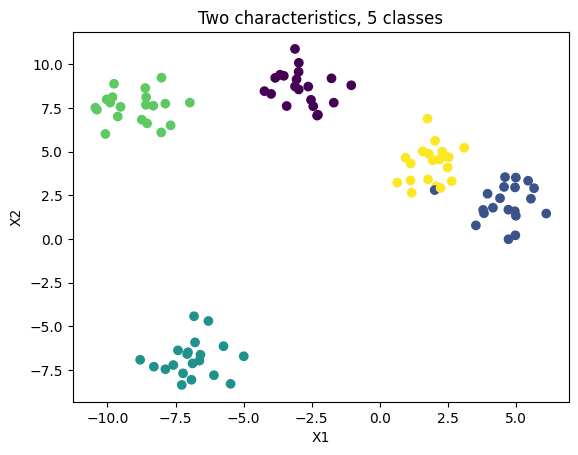

In [41]:
from sklearn.datasets import make_blobs

#Generate Data
X_train, true_labels = make_blobs(n_samples=100, centers=5, random_state=42)

# Plot
plt.scatter( X_train[:,0], X_train[:,1], c=true_labels, cmap = 'viridis')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title ('Two characteristics, 5 classes')
plt.show()